МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №3
«Побудова фракталів з використанням L-систем»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib widget

import matplotlib.animation as animation

In [2]:
np.radians(np.radians(np.pi))

0.0009569838481574019

plt.close(fig='all') 
# plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (line2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [3]:
def calculate_xy(axiom, N, L, fi, dfi):
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    for i in range(N):
        # print(x[i], x)
        x[i+1] = x[i]
        y[i+1] = y[i]
        if axiom[i] == 'F':
            x[i+1] += L*np.cos(fi)
            y[i+1] += L*np.sin(fi)
        elif axiom[i] == '+':
            fi += dfi
        elif axiom[i] == '-':
            fi -= dfi
    return x, y

In [4]:
def plot_fractal(axiom, fi, dfi, show_on_one, is_animation=False):
    N = len(axiom)
    L = 2
    fig, ax = plt.subplots()
    if not is_animation:
        x1, y1 = calculate_xy(axiom, N, L, fi, dfi)
        ax.plot(x1, y1)
    else:
        all_data = []
        dphi_data = []
        for dphi in np.arange(dfi[0], dfi[1], dfi[2]):
            x, y = calculate_xy(axiom, N, L, fi, dphi)
            all_data += [[x, y]]
            dphi_data += [dphi]
            
        def update(frame):
            ax.clear()
            x, y = all_data[frame]
            ax.plot(x, y)
            ax.set_title(f'dphi={dphi_data[frame]}')
        
        ani = animation.FuncAnimation(fig=fig, func=update, frames=len(all_data), interval=30)
    if not show_on_one:
        plt.show()

def plot_fractal(axiom, fi, dfi, show_on_one, need_output=False):
    # print('I was called')
    # print(type(dfi))
    if type(dfi) is not list:
        # print('I am doing some work')
        N = len(axiom)
        x = np.zeros(N+1)
        y = np.zeros(N+1)
        L = 2
        for i in range(N):
            # print(x[i], x)
            x[i+1] = x[i]
            y[i+1] = y[i]
            if axiom[i] == 'F':
                x[i+1] += L*np.cos(fi)
                y[i+1] += L*np.sin(fi)
            elif axiom[i] == '+':
                fi += dfi
            elif axiom[i] == '-':
                fi -= dfi
        # print(f'x: {x}, y: {y}')
    else:
        # print('I am doing some data')
        all_data = []
        dphi_data = []
        for dphi in np.arange(dfi[0], dfi[1], dfi[2]):
            # print('I called myself')
            all_data += [plot_fractal(axiom, fi, dphi, show_on_one, need_output=True)]
            dphi_data += [dphi]
            # print(all_data)
    if not need_output:
        fig, ax = plt.subplots()
        if type(dfi) is not list:
            ax.plot(x, y)
        else:
            ax.plot(all_data[0])
            def update(frame):
                ax.clear()
                ax.plot(all_data[frame], linewidth=0.4)
                ax.set_title(f'dfi={dphi_data[frame]}')
            ani = animation.FuncAnimation(fig=fig, func=update, frames=len(all_data), interval=200)
        if not show_on_one:
            plt.show()
    else:
        # print('I will return x and y')
        return x, y

In [5]:
def create_fractal(axiom, rule, max_iter, fi, dfi, is_degree=False, show_all=False, show_on_one=False, is_animation=False):
    if is_degree:
        fi = np.radians(fi)
        if not is_animation:
            dfi = np.radians(dfi)
        else:
            for element in dfi:
                dfi[dfi.index(element)] = np.radians(element)
    if type(rule) is str:
        for iteration in range(max_iter):
            # print(axiom)
            new_axiom = ''
            for word_place in range(len(axiom)):
                if axiom[word_place] == 'F':
                    new_axiom += rule
                else:
                    new_axiom += axiom[word_place]
            axiom = new_axiom
            if show_all:
                plot_fractal(axiom, fi, dfi, show_on_one, is_animation)
    elif type(rule) is dict:
        for iteration in range(max_iter):
            # print(axiom)
            new_axiom = ''
            for word_place in range(len(axiom)):
                # print(rule.keys())
                if axiom[word_place] in rule.keys():
                    new_axiom += rule[axiom[word_place]]
                else:
                    new_axiom += axiom[word_place]
            axiom = new_axiom
            if show_all:
                plot_fractal(axiom, fi, dfi, show_on_one, is_animation)
    # print(axiom)
    if not show_all:
        plot_fractal(axiom, fi, dfi, show_on_one, is_animation)

1. Ознайомитись з теоретичними відомостями лабораторної роботи щодо L-
систем та методів їх побудови.

2. Ознайомитись з фракталами, які запропоновані для побудови з
використанням L-систем.
3. Обрати 8 будь-яких із запропонованих фракталів та реалізувати їх
(написати відповідну програму). Врахувати те, що для побудови
фрактальної кривої використовується змінна F та символи «+» і «–». Інші
змінні у даних фракталах використовуються для побудови співвідношень,
але не для самої візуалізації.
4. Спробувати змінити кут θ (angle) при побудові цих об’єктів. Отримати
новий фрактальний об’єкт.
5. Модифікувати програму з пунктів 3 і 4 даних завдань для побудови
фракталів з кутом θmin ≤ θ ≤ θmax. Зробити відображення у вигляді
плавного переходу для вказаного діапазону θ ∈ [θmin; θmax].
6. Сформувати звіт з лабораторної роботи у форматі PDF з отриманими
результатами, надіслати його до класруму.
7. Показати практичні результати викладачі і захистити роботу.

1. Кристалоподібний фрактал

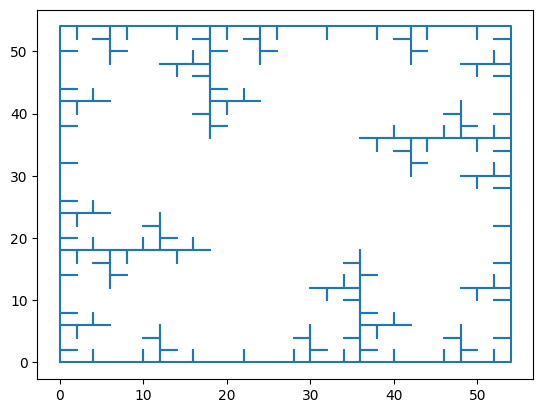

In [7]:
plt.close(fig='all') 
axiom = "F+F+F+F"
rule = "FF+F++F+F"
max_iter = 3
fi = 0
dfi = np.pi/2
# dfi = [0, 2*np.pi, 1e-2]
create_fractal(axiom, rule, max_iter, fi, dfi, is_animation=False)

2. Фрактальна крива Пеано

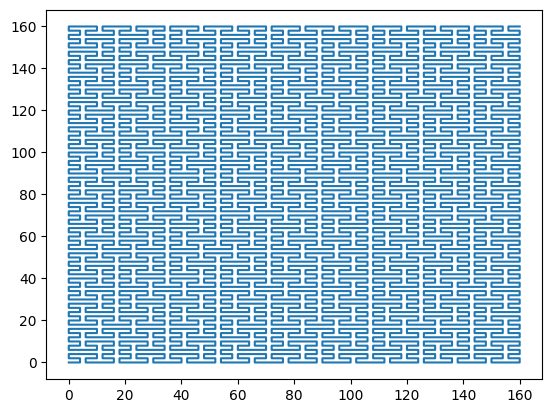

In [ ]:
axiom = "X"
rule = {"X": "XFYFX+F+YFXFY-F-XFYFX", "Y": "YFXFY-F-XFYFX+F+YFXFY"}
max_iter = 4
fi = 0
dfi = np.pi/2
create_fractal(axiom, rule, max_iter, fi, dfi, show_all=False)

3. Закрита квадратна сніжинка

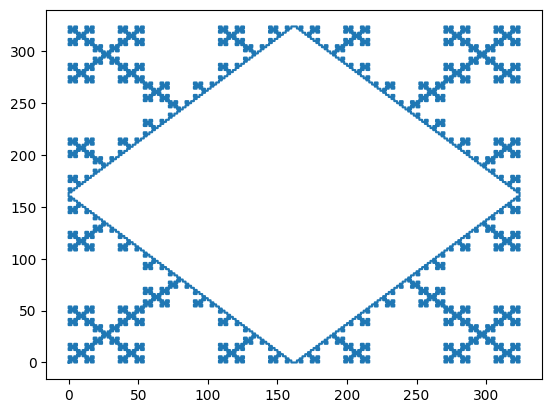

In [ ]:
axiom = "FF+FF+FF+FF"
rule = "F+F-F-F+F"
max_iter = 4
fi = 0
dfi = np.pi/2
create_fractal(axiom, rule, max_iter, fi, dfi)

4. Фрактальна зірочка

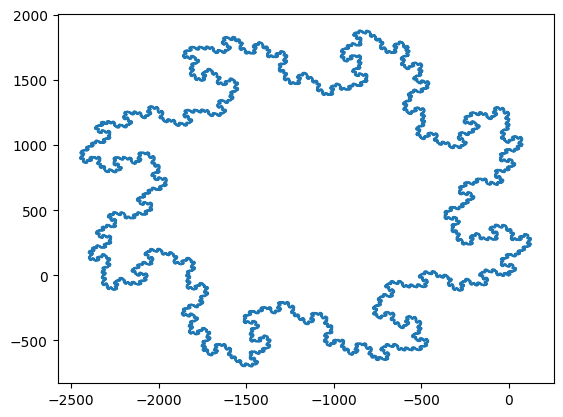

In [ ]:
axiom = "X+X+X+X+X+X+X+X"
rule = {"X": "X+YF++YF-FX--FXFX-YF+X", "Y": "-FX+YFYF++YF+FX--FX-YF"}
max_iter = 4
fi = 0
dfi = np.pi/4
create_fractal(axiom, rule, max_iter, fi, dfi)

5. Фрактальна дошка

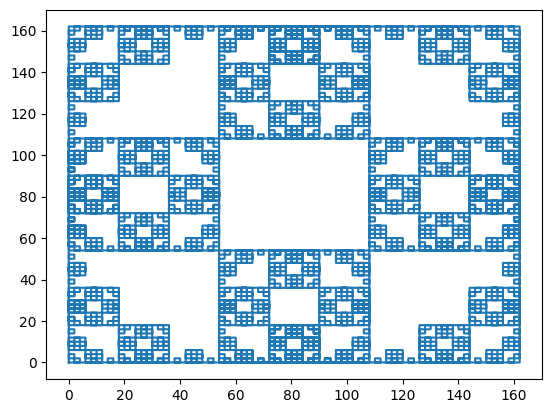

In [ ]:
axiom = "F+F+F+F"
rule = "FF+F+F+F+FF"
max_iter = 4
fi = 0
dfi = np.pi/2
create_fractal(axiom, rule, max_iter, fi, dfi)

6. П’ятикутна фрактальна сніжинка

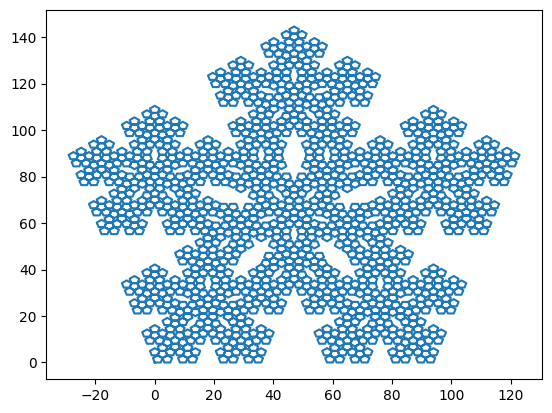

In [ ]:
axiom = "F++F++F++F++F"
rule = "F++F++F+++++F-F++F"
max_iter = 4
fi = 0
dfi = 36
create_fractal(axiom, rule, max_iter, fi, dfi, True)

7. Крива дракона

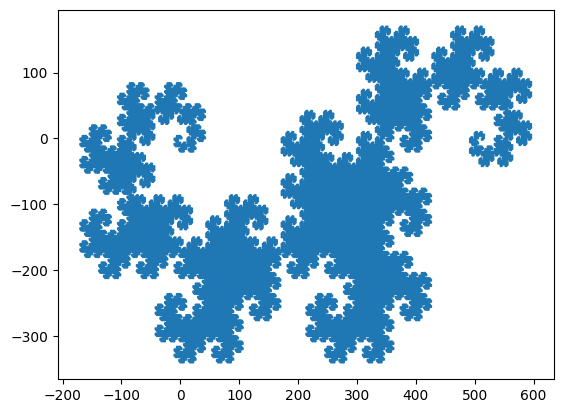

In [ ]:
axiom = "FX"
rule = {"X": "X+YF+", "Y": "-FX-Y"}
max_iter = 16
fi = 0
dfi = 90
create_fractal(axiom, rule, max_iter, fi, dfi, True)

8. Гексагональна крива Госпера

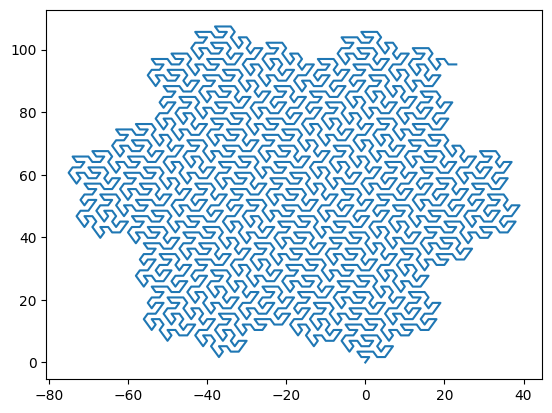

In [ ]:
axiom = "XF"
rule = {"X": "X+YF++YF-FX--FXFX-YF+", "Y": "-FX+YFYF++YF+FX--FX-Y"}
max_iter = 4
fi = 0
dfi = 60
create_fractal(axiom, rule, max_iter, fi, dfi, True)